In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)


## 1. Подготовка данных


In [2]:
from google.colab import files

# Загружаем датасет
uploaded = files.upload()

Saving Housing.csv to Housing (1).csv


In [3]:

# Загрузка данных
df = pd.read_csv('Housing.csv')

# Предобработка
df_clean = df.copy()

# Преобразование бинарных признаков
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df_clean[col] = df_clean[col].map({'yes': 1, 'no': 0})




In [4]:
# Посмотрим на доступные стили
print("Доступные стили Matplotlib:")
print(plt.style.available[:10])  # Показываем первые 10

Доступные стили Matplotlib:
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot']


In [5]:
# Установим глобальные параметры для всех графиков
plt.rcParams['figure.figsize'] = (14, 8)  # Размер по умолчанию
plt.rcParams['font.size'] = 11  # Размер шрифта
plt.rcParams['axes.labelsize'] = 12  # Размер подписей осей
plt.rcParams['axes.titlesize'] = 14  # Размер заголовков
plt.rcParams['xtick.labelsize'] = 10  # Размер меток X
plt.rcParams['ytick.labelsize'] = 10  # Размер меток Y
plt.rcParams['legend.fontsize'] = 10  # Размер шрифта легенды
plt.rcParams['figure.titlesize'] = 16  # Размер заголовка фигуры

# Устанавливаем стиль Seaborn
sns.set_style("whitegrid")
sns.set_palette("husl")  # Цветовая палитра



# Работа с палитрами

https://seaborn.pydata.org/tutorial/color_palettes.html



**Типы палитр:**
- **Качественные** (categorical) - для категориальных данных
- **Последовательные** (sequential) - для упорядоченных данных
- **Дивергентные** (diverging) - для данных с центральной точкой

**Популярные палитры Seaborn:**
- `deep`, `muted`, `pastel`, `bright`, `dark`, `colorblind` - качественные
- `Blues`, `Greens`, `Reds`, `YlOrRd` - последовательные
- `coolwarm`, `RdBu`, `RdYlGn`, `icefire` - дивергентные


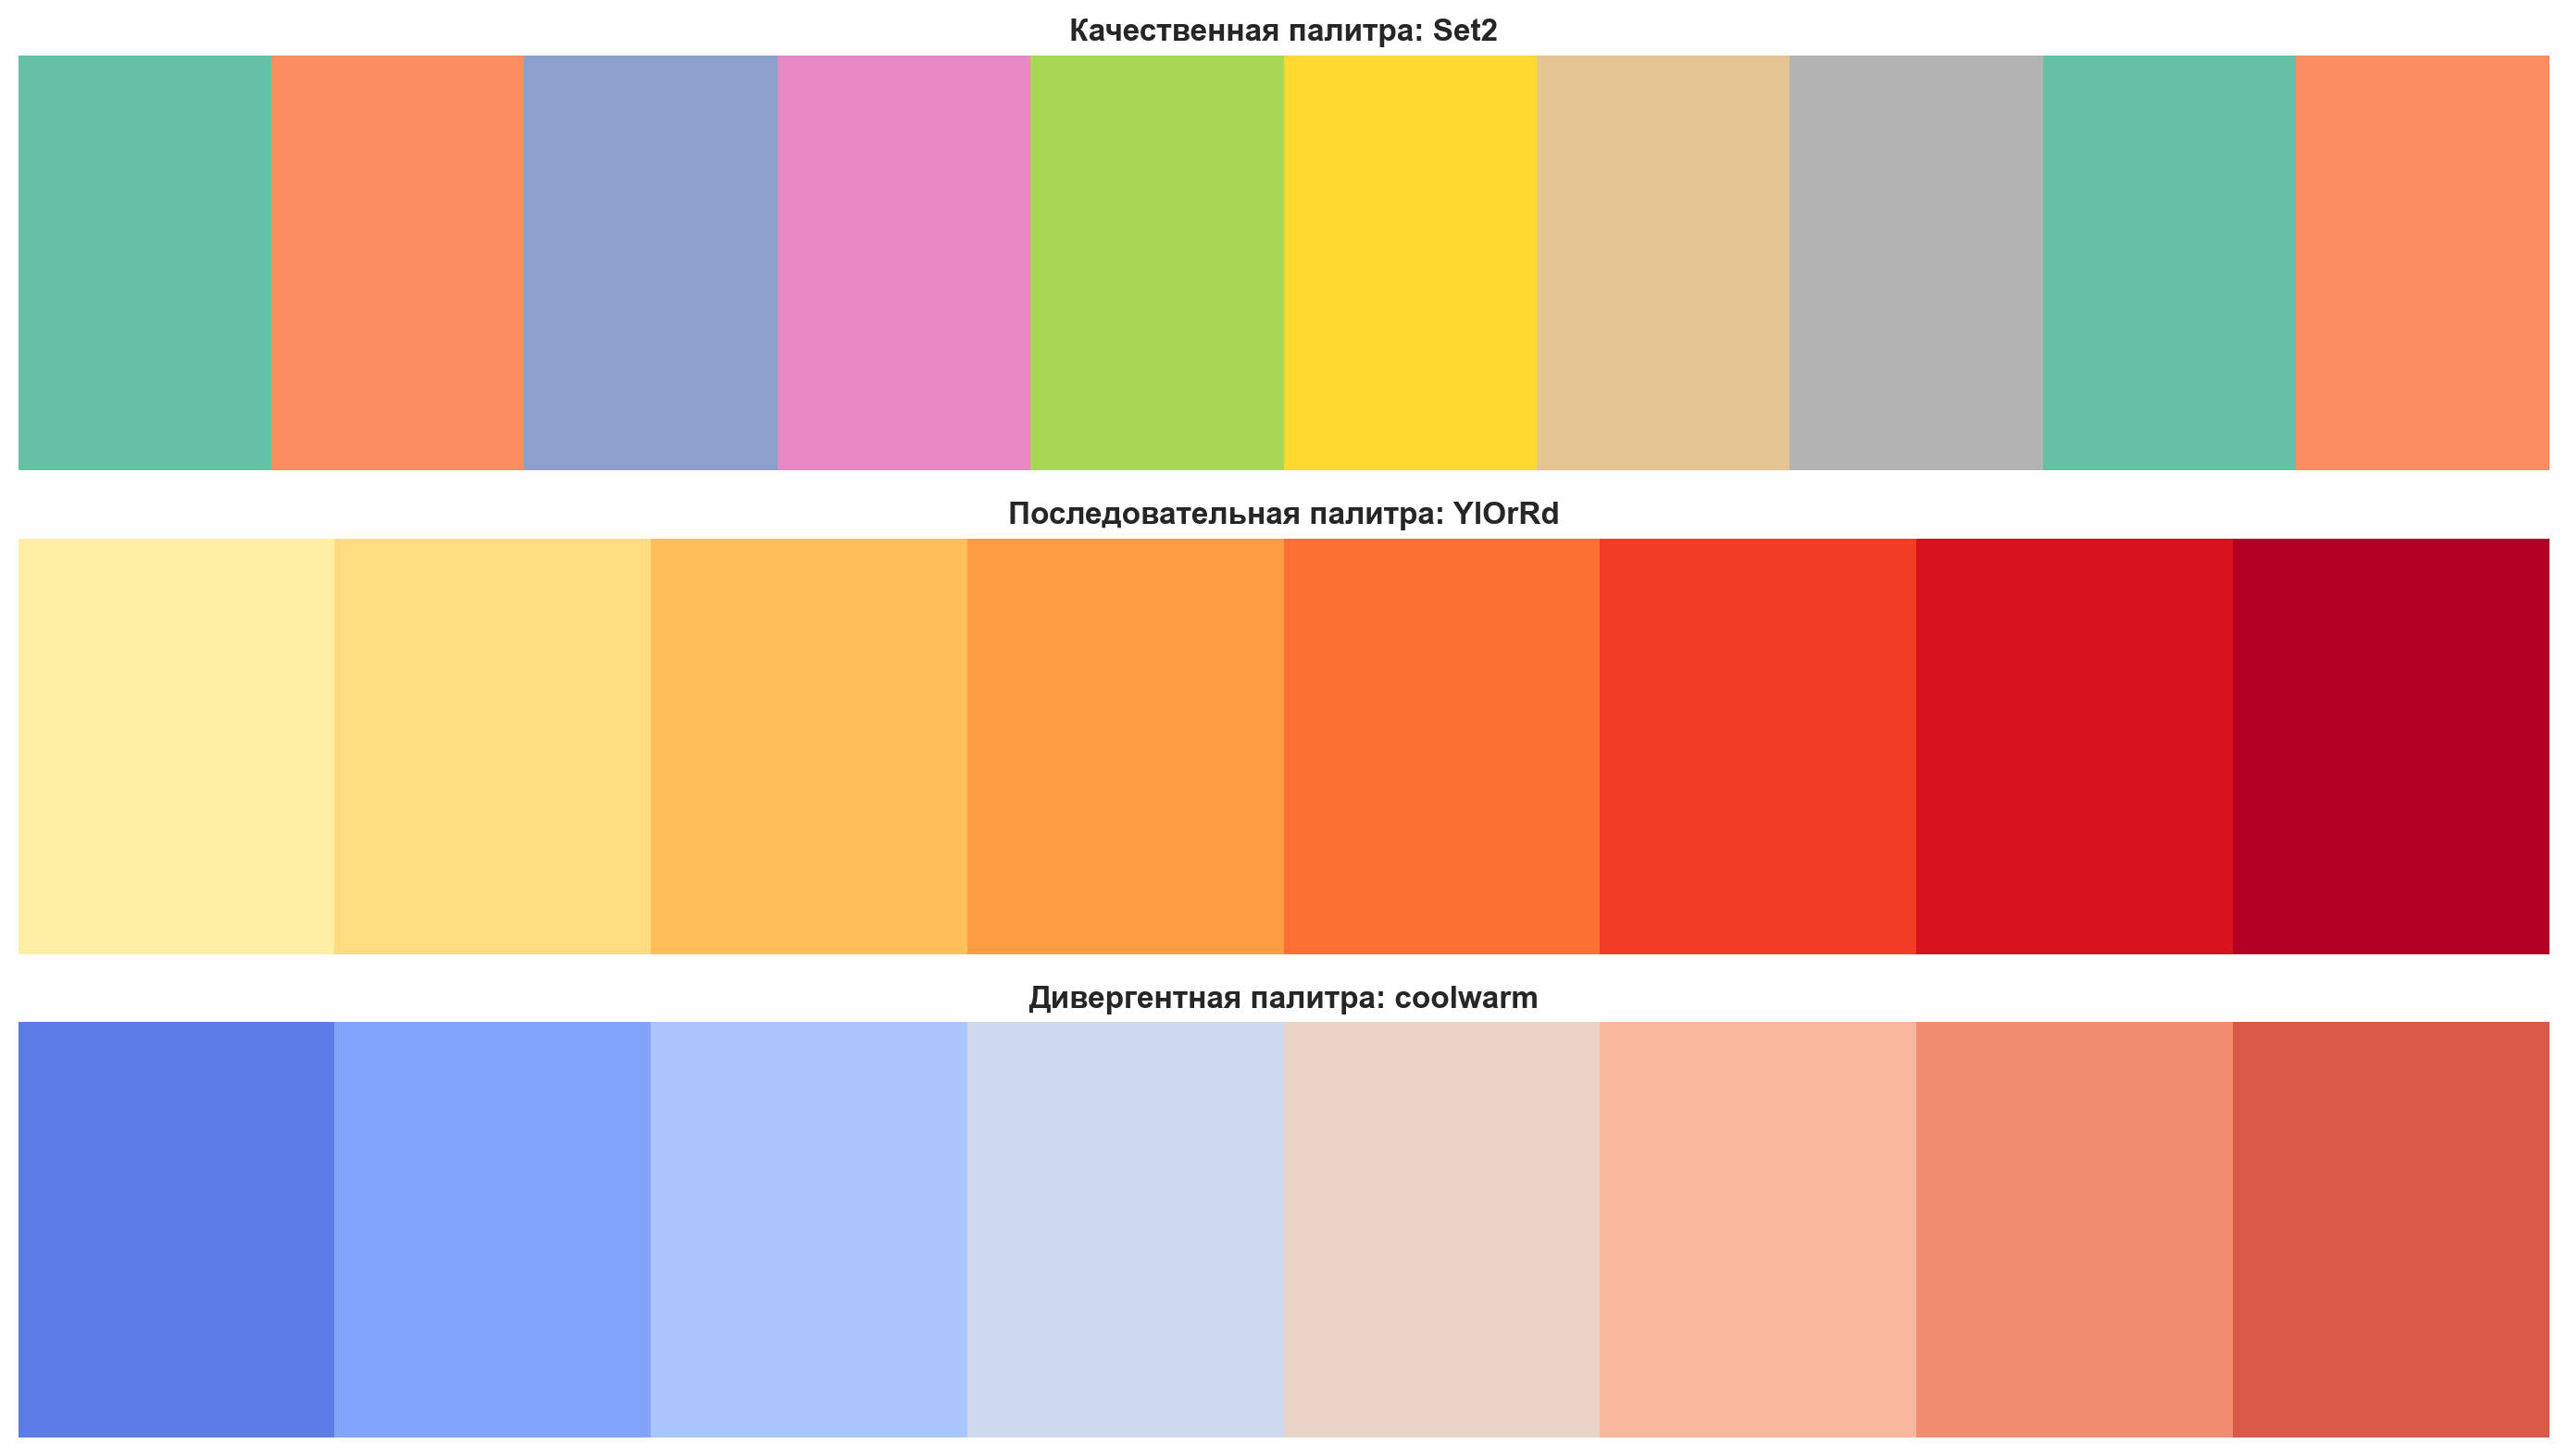


Кастомная палитра создана!


In [6]:
# Демонстрация различных палитр
fig, axes = plt.subplots(3, 1, figsize=(14, 8))

# Качественная палитра
axes[0].imshow([sns.color_palette("Set2", 10)], aspect='auto')
axes[0].set_title("Качественная палитра: Set2", fontsize=12, fontweight='bold')
axes[0].axis('off')

# Последовательная палитра
axes[1].imshow([sns.color_palette("YlOrRd", 8)], aspect='auto')
axes[1].set_title("Последовательная палитра: YlOrRd", fontsize=12, fontweight='bold')
axes[1].axis('off')

# Дивергентная палитра
axes[2].imshow([sns.color_palette("coolwarm", 8)], aspect='auto')
axes[2].set_title("Дивергентная палитра: coolwarm", fontsize=12, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Создаем кастомную палитру
custom_palette = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#FFA07A", "#98D8C8"]
print("\nКастомная палитра создана!")


## 2. Кастомизация графиков Seaborn

### 2.1. Основы кастомизации

Seaborn предоставляет несколько уровней кастомизации:
1. **Глобальные настройки** - применяются ко всем графикам
2. **Параметры функций** - специфичны для конкретного графика
3. **Matplotlib API** - для детальной настройки

### Ключевые параметры кастомизации:

| Параметр | Описание | Пример значений |
|----------|----------|-----------------|
| `color` / `palette` | Цвета | 'blue', 'Set2', ['#FF0000', '#00FF00'] |
| `hue` | Разделение по категориям | название столбца |
| `style` / `markers` | Стиль маркеров | 'o', 's', '^' |
| `size` | Размер элементов | число или название столбца |
| `alpha` | Прозрачность | 0.0 - 1.0 |
| `linewidth` / `lw` | Толщина линий | число |
| `edgecolor` | Цвет границ | название цвета |



### 2.2. Пример: Кастомизация Scatter Plot

https://seaborn.pydata.org/generated/seaborn.scatterplot.html  



In [ ]:

# Базовый scatter plot
plt.figure(figsize=(14, 6))

# Subplot 1: Базовый
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='area', y='price')
plt.title('Базовый scatter plot', fontsize=14, fontweight='bold')




### Упражнение 1: Кастомизация Scatter Plot

**Задание:**
Создайте scatter plot для взаимосвязи `bedrooms` и `price` со следующими параметрами:
1. Цвет точек зависит от `airconditioning`
2. Размер точек зависит от `area`
3. Используйте палитру 'Set1'
4. Установите прозрачность 0.6
5. Добавьте черные границы толщиной 1
6. Настройте заголовок и подписи осей



### 2.3. Кастомизация Line Plot и других графиков

**Line Plot** используется для:
- Временных рядов
- Трендов
- Агрегированных данных

https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [ ]:
# Подготовка данных: средняя цена по количеству спален
avg_price = df.groupby('bedrooms')['price'].agg(['mean', 'std', 'count']).reset_index()
avg_price

In [ ]:
plt.figure(figsize=(14, 6))

# Subplot 1: Базовый line plot
plt.subplot(1, 2, 1)
sns.lineplot(data=avg_price, x='bedrooms', y='mean')
plt.title('Базовый line plot', fontsize=14, fontweight='bold')
plt.ylabel('Средняя цена')




### 2.4. Кастомизация Bar Plot

**Bar Plot** подходит для:
- Сравнения категорий
- Отображения агрегированных значений
- Ранжирования

https://seaborn.pydata.org/generated/seaborn.barplot.html

In [ ]:
# Создаем данные для bar plot
amenities_count = df_clean[['mainroad', 'guestroom', 'basement',
                             'hotwaterheating', 'airconditioning', 'prefarea']].sum()
amenities_count = amenities_count.sort_values(ascending=False)

plt.figure(figsize=(14, 6))

# Subplot 1: Вертикальный bar plot
plt.subplot(1, 2, 1)
sns.barplot(
    x=amenities_count.index,
    y=amenities_count.values,
    palette='Blues_d',   # Палитра с градиентом
    edgecolor='black',   # Цвет границ
    linewidth=1.5,       # Толщина границ
    alpha=0.8            # Прозрачность
)
plt.title('Популярность удобств (вертикальный)', fontsize=14, fontweight='bold')
plt.xlabel('Удобство', fontsize=12)
plt.ylabel('Количество домов', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)




### Упражнение 2: Кастомизация Bar Plot

**Задание:**
Создайте горизонтальный bar plot, показывающий среднюю цену для каждого значения `stories`:
1. Отсортируйте по убыванию средней цены
2. Используйте палитру 'rocket'
3. Добавьте черные границы толщиной 2
4. Настройте заголовок и подписи осей



## 3. Отрисовка нескольких графиков

### 3.1. Методы создания множественных графиков

Seaborn предлагает несколько подходов:

1. **plt.subplots() + axes-level функции**
   - Полный контроль над расположением
   - Требует явного указания осей
   
2. **Figure-level функции с параметрами col/row**
   - Автоматическое создание сетки
   - Меньше кода
   
3. **FacetGrid**
   - Максимальная гибкость
   - Для сложных многомерных визуализаций



### 3.2. Метод 1: plt.subplots() с axes-level функциями


Text(0.5, 1.0, 'bedrooms bin')

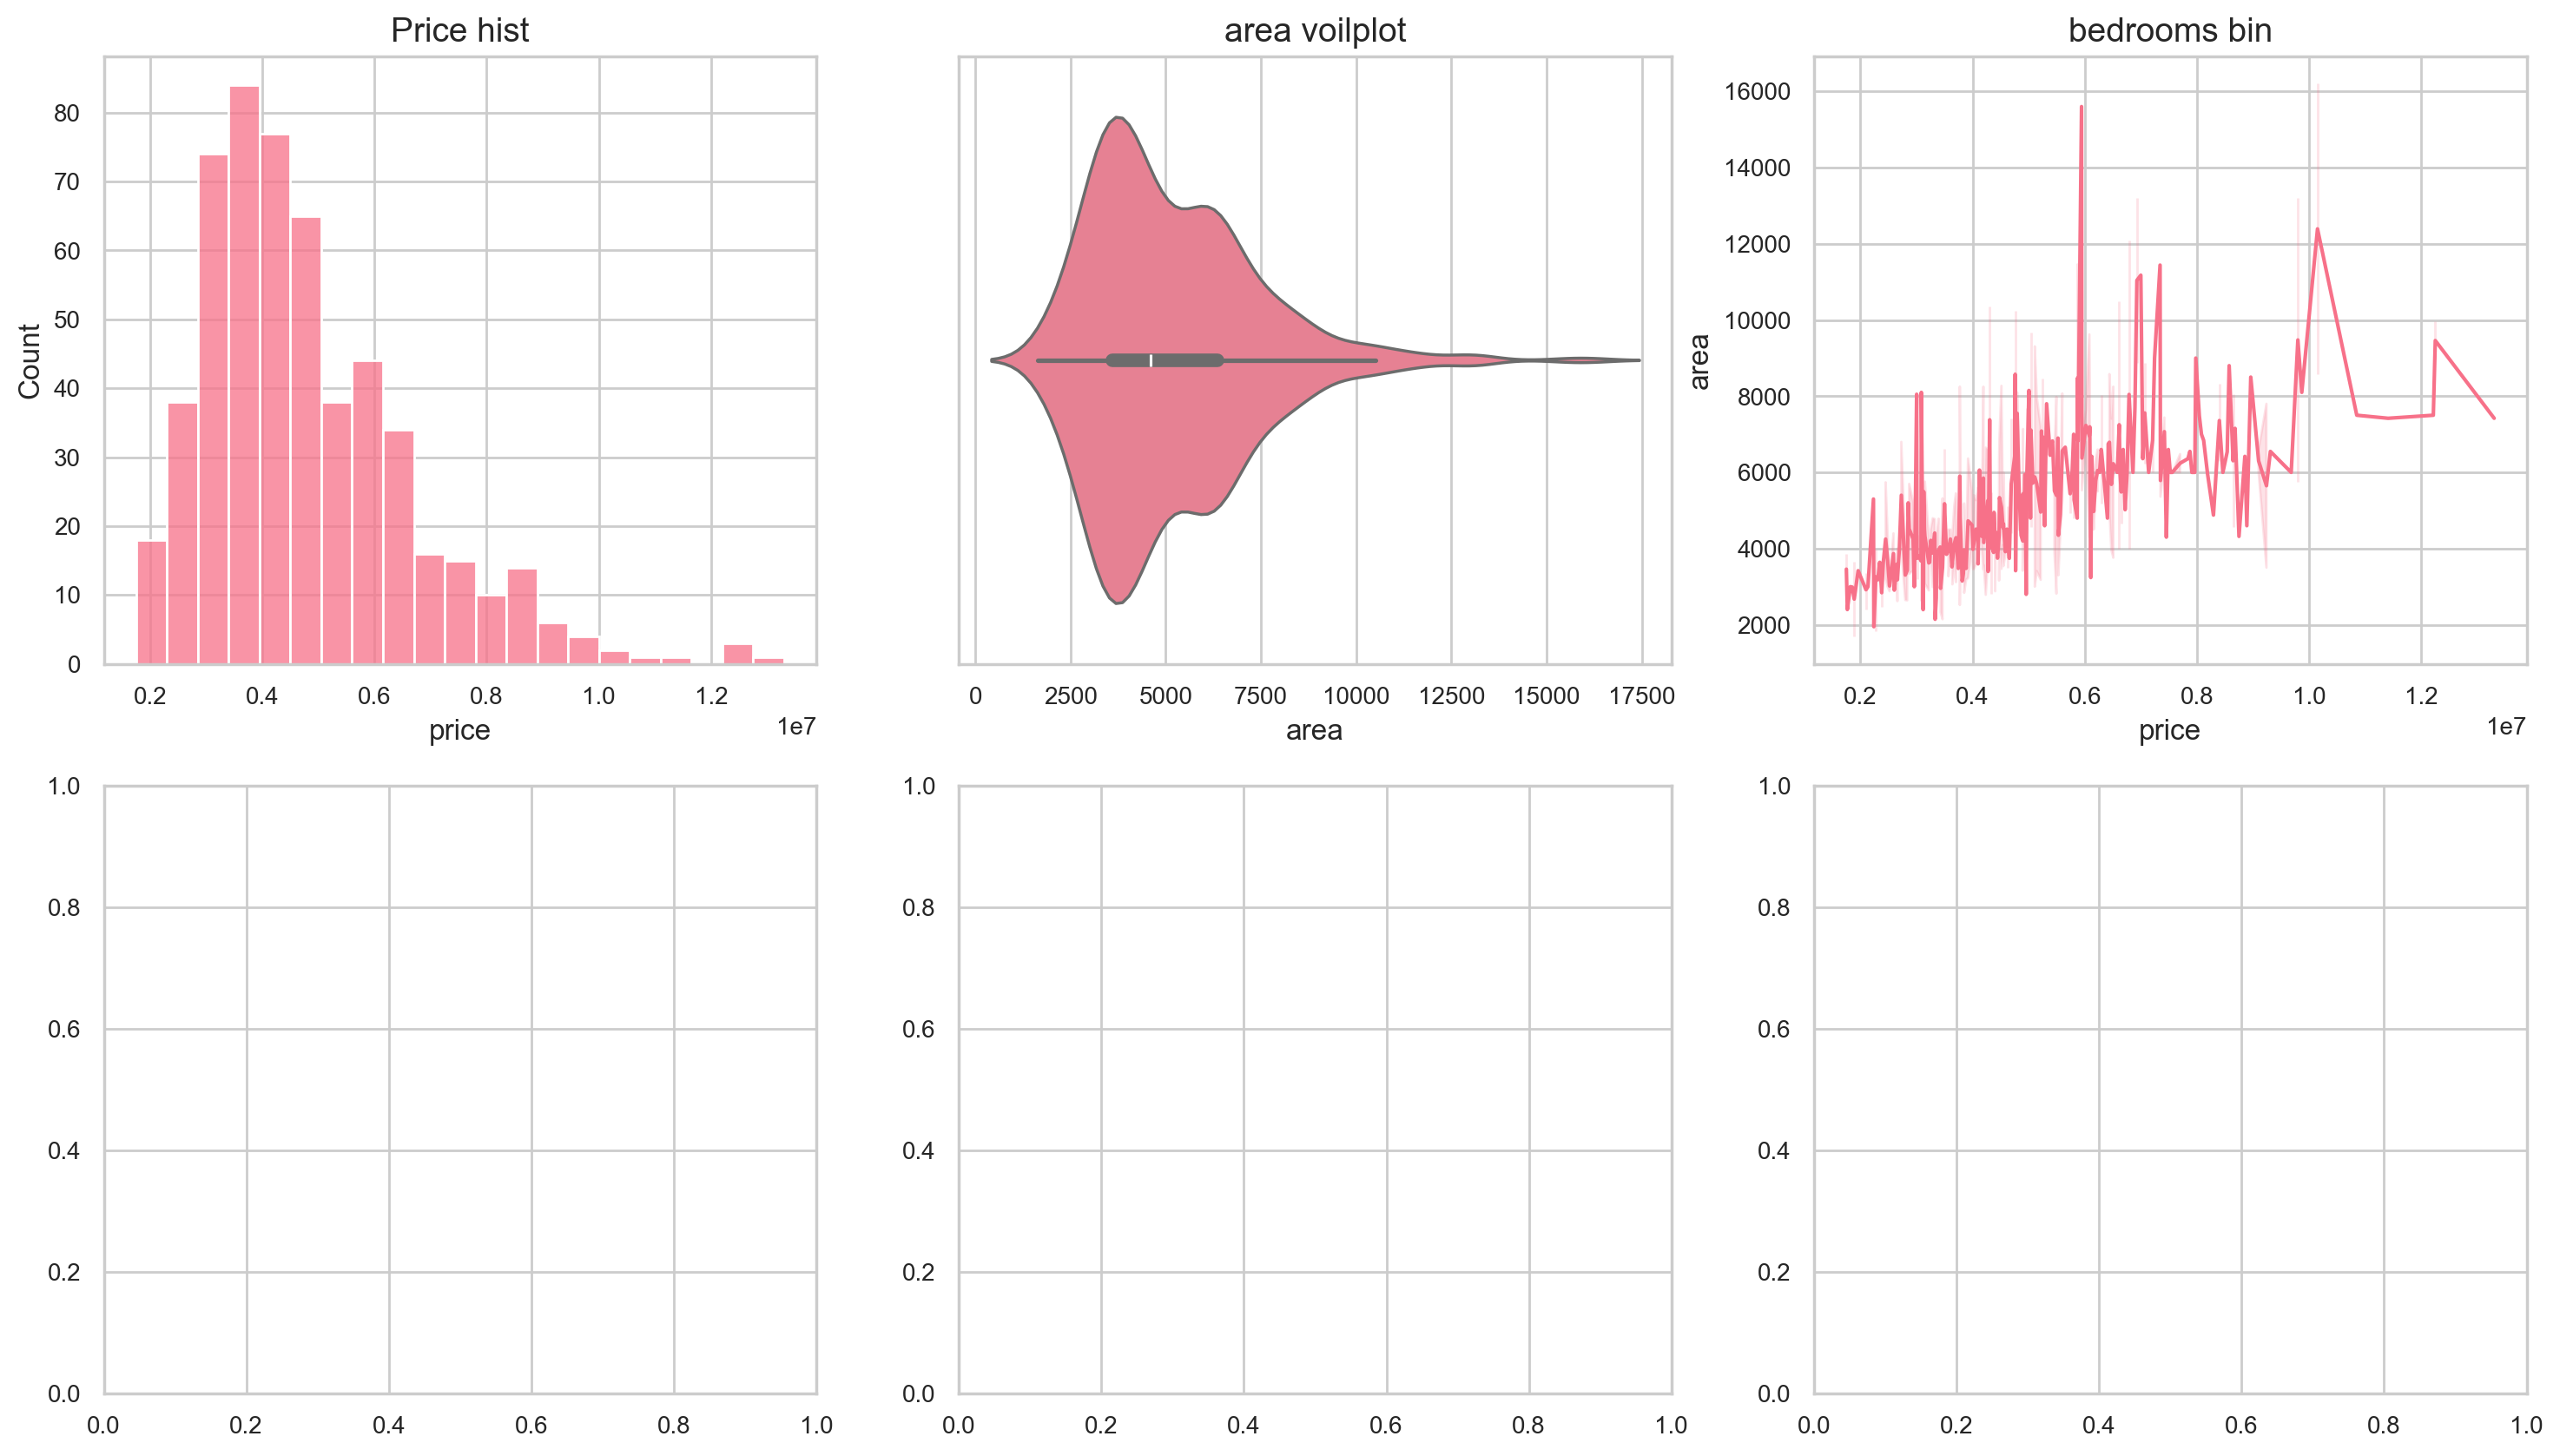

In [10]:
fig, axes = plt.subplots(2,3, figsize = (18,10))

sns.histplot(df_clean,
             x = 'price',
             ax = axes[0, 0])
axes[0, 0].set_title('Price hist')
sns.violinplot(df_clean,
             x = 'area',
             ax = axes[0, 1])
axes[0, 1].set_title('area voilplot')
sns.lineplot(df_clean,
             x = 'price',
             y = 'area',
             ax = axes[0, 2])
axes[0, 2].set_title('price-area dependence')



### 3.3. Метод 2: Figure-level функции с col/row

Seaborn relplot — это функция высокого уровня для построения реляционных графиков (relational plots) в библиотеке Seaborn, позволяющая визуализировать связь между двумя переменными с возможностью кодирования дополнительных переменных цветом, размером, стилем и разбивкой на подграфики (фасеты)

**Преимущества:**
- Автоматическое создание facets
- Меньше кода
- Единообразный стиль


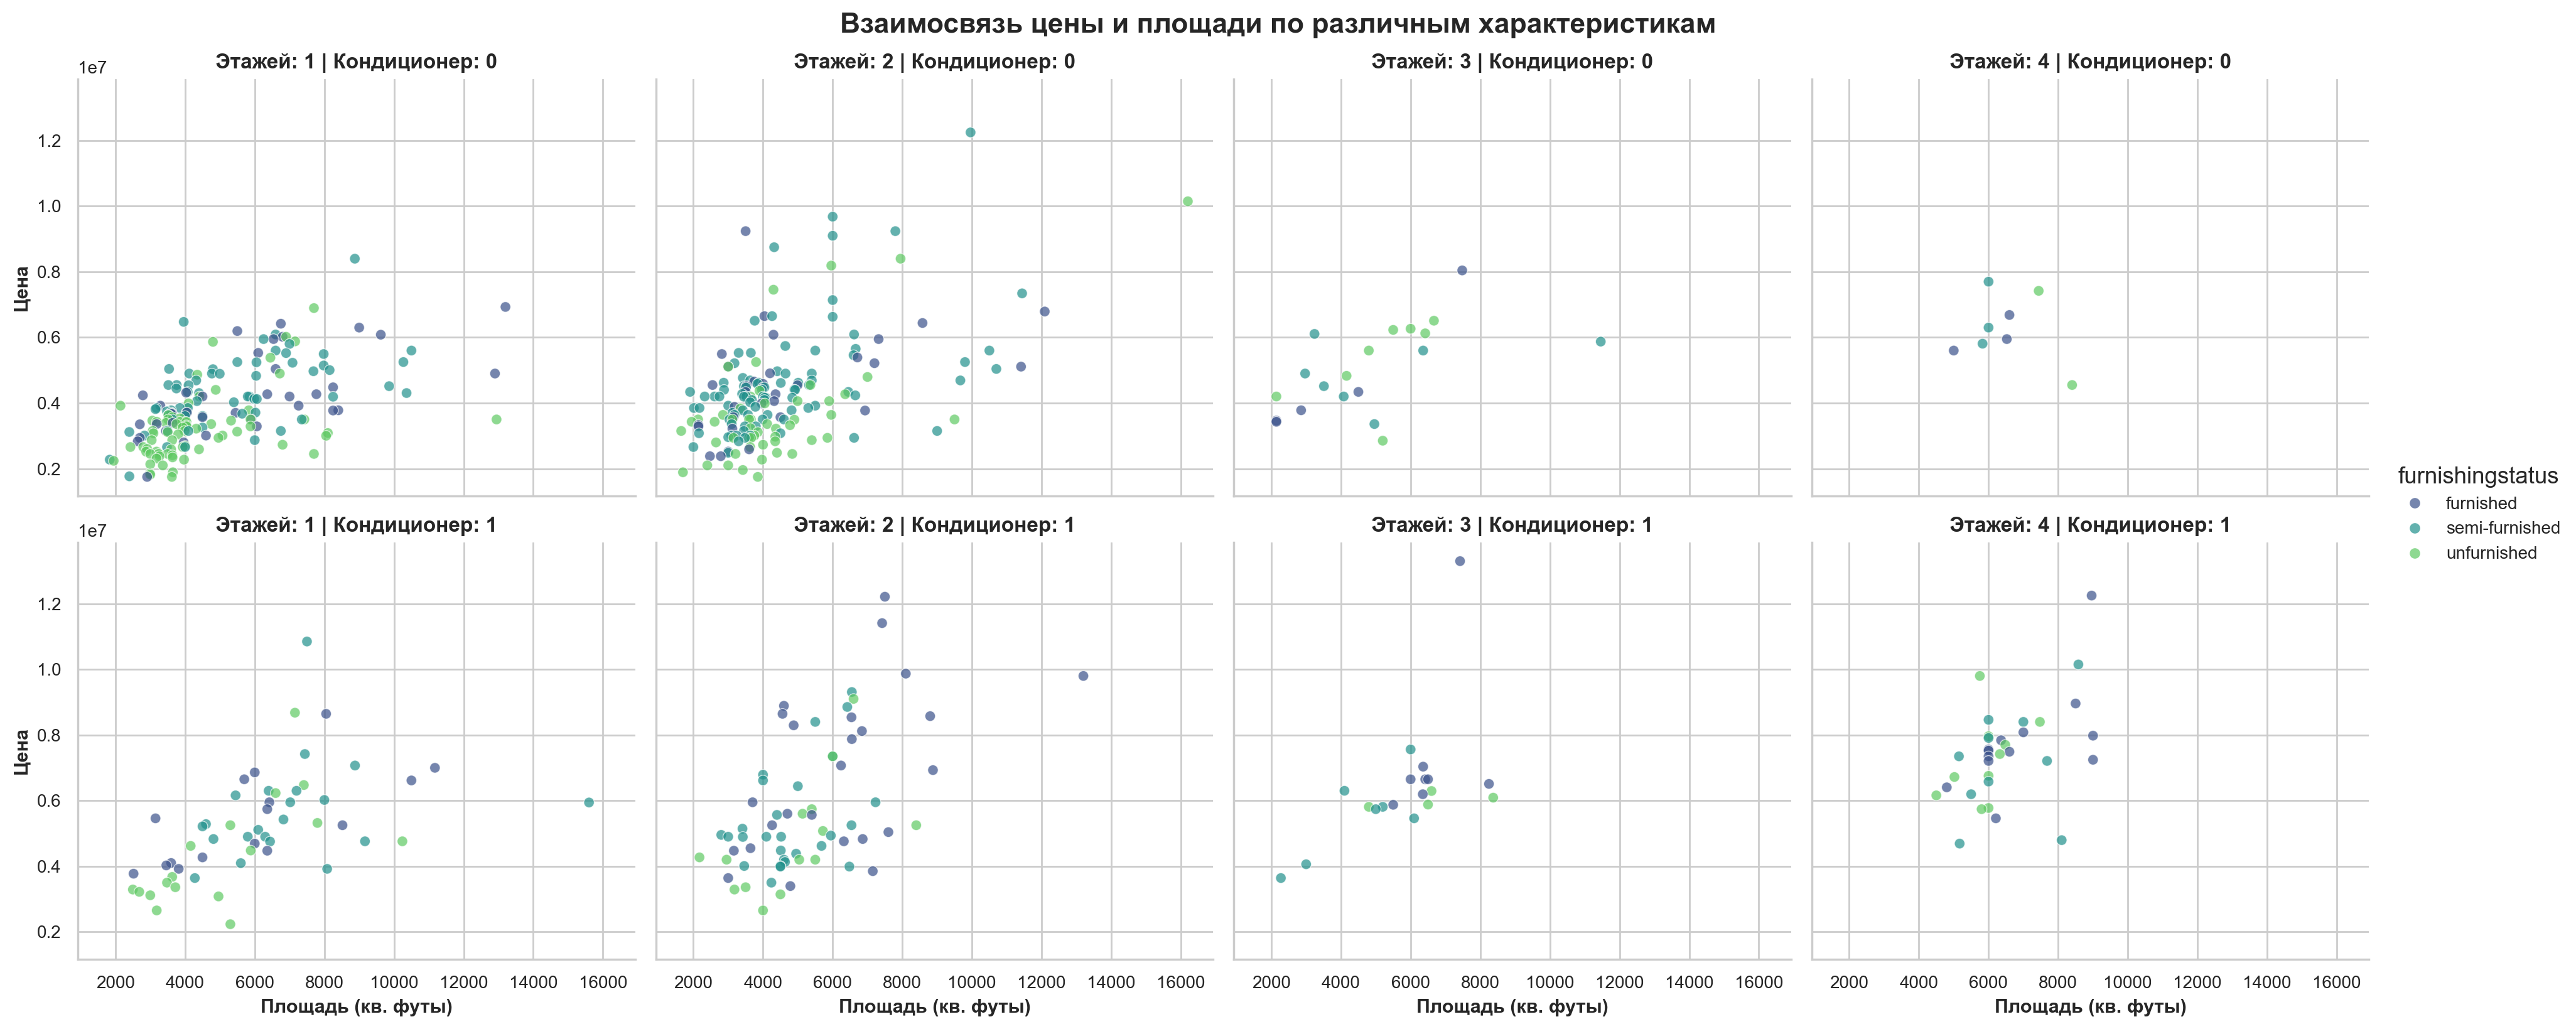

In [18]:
# relplot с col и row
g = sns.relplot(
    data=df_clean,
    x='area',
    y='price',
    hue='furnishingstatus',      # Цвет по спальням
    col='stories',       # Столбцы по этажам
    row='airconditioning',  # Строки по кондиционеру
    palette='viridis',
    alpha=0.7,
    height=4,            # Высота каждого subplot
    aspect=1.2,          # Соотношение сторон
    facet_kws={'sharex': True, 'sharey': True}  # Общие оси
)

# Настройка заголовков facets
g.set_titles("Этажей: {col_name} | Кондиционер: {row_name}", fontsize=12, fontweight='bold')

# Настройка подписей осей
g.set_axis_labels("Площадь (кв. футы)", "Цена", fontsize=11, fontweight='bold')

# Общий заголовок
g.fig.suptitle('Взаимосвязь цены и площади по различным характеристикам',
               fontsize=16, fontweight='bold', y=1.02)

plt.show()



### Домашнее задание: Создание множественных графиков

**Задание:**
Создайте сетку 2x2 с помощью `plt.subplots()`, содержащую:
1. **[0,0]** - Histogram распределения `area` с KDE
2. **[0,1]** - Box plot для `price` по `furnishingstatus`
3. **[1,0]** - Scatter plot `bathrooms` vs `price` с hue по `basement`
4. **[1,1]** - Count plot для `parking`

Все графики должны иметь:
- Заголовки
- Подписи осей
- Кастомные цветовые палитры



## 4. FacetGrid - продвинутая многомерная визуализация

### 4.1. Что такое FacetGrid?

**FacetGrid** - это мощный инструмент Seaborn для создания сетки графиков на основе категориальных переменных.

**Основные методы:**
- `map()` - применяет функцию ко всем facets
- `map_dataframe()` - для функций, принимающих DataFrame
- `add_legend()` - добавляет легенду
- `set_titles()` - настраивает заголовки
- `set_axis_labels()` - настраивает подписи осей

**Параметры FacetGrid:**
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html


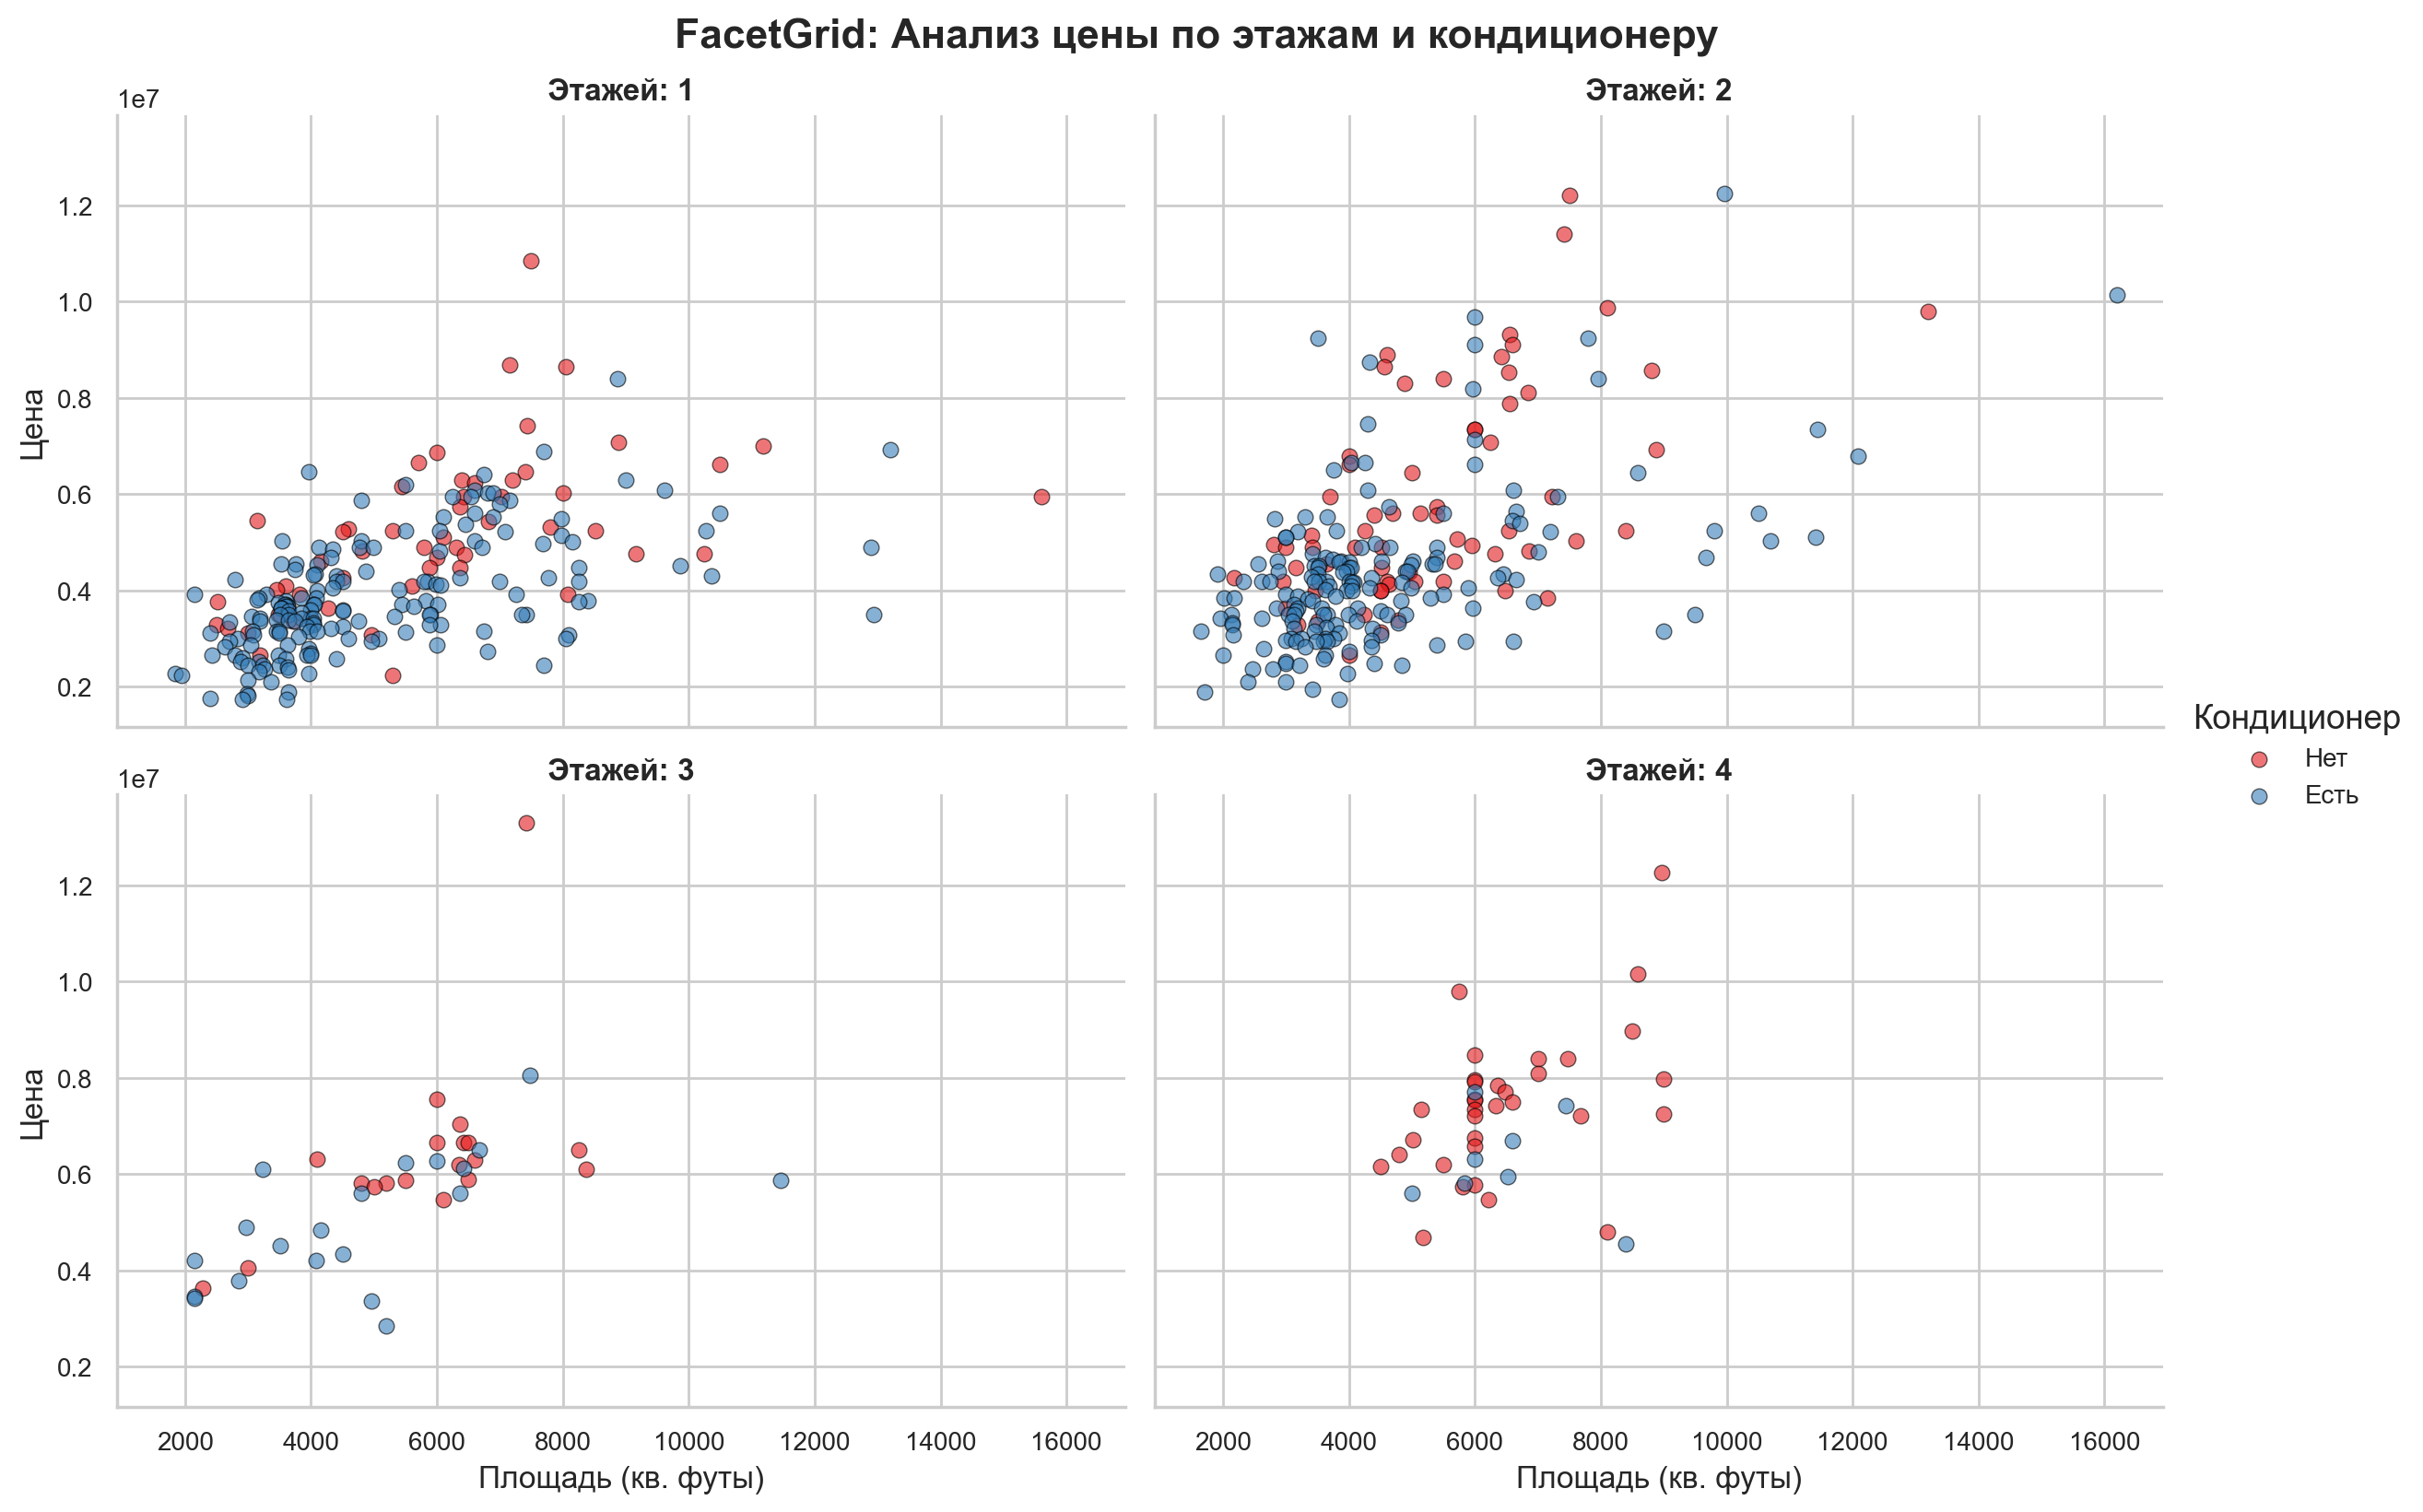

In [11]:
# Базовый FacetGrid
g = sns.FacetGrid(
    df,
    col='stories',       # Столбцы по количеству этажей
    hue='airconditioning',  # Цвет по кондиционеру
    col_wrap=2,          # Максимум 2 столбца в строке
    height=4,            # Высота каждого subplot
    aspect=1.5,          # Соотношение сторон (ширина/высота)
    palette='Set1',      # Цветовая палитра
    legend_out=True      # Легенда вне графиков
)

# Применяем scatter plot ко всем facets
g.map(
    plt.scatter,         # Функция для отрисовки
    'area',              # X переменная
    'price',             # Y переменная
    alpha=0.6,           # Дополнительные параметры
    edgecolor='black',
    linewidth=0.5
)

# Настройка
g.set_titles("Этажей: {col_name}", fontsize=14, fontweight='bold')
g.set_axis_labels("Площадь (кв. футы)", "Цена", fontsize=12)
g.add_legend(title='Кондиционер', labels=['Нет', 'Есть'])

# Общий заголовок
g.fig.suptitle('FacetGrid: Анализ цены по этажам и кондиционеру',
               fontsize=16, fontweight='bold', y=1.02)

plt.show()



### 4.2. FacetGrid с кастомными функциями

Можно создавать собственные функции для отрисовки:


In [13]:
# Определяем кастомную функцию для отрисовки
def custom_plot(x, y, **kwargs):
    """
    Кастомная функция для FacetGrid.
    Рисует scatter plot с линией среднего значения.
    """
    # Scatter plot
    plt.scatter(x, y, **kwargs)

    # Линия среднего значения Y
    mean_y = y.mean()
    plt.axhline(mean_y,
                color='red',
                linestyle='--',
                linewidth=2,
                alpha=0.7,
                label=f'Среднее: {mean_y:,.0f}'
                )

    # Добавляем текст
    plt.text(0.05,
             0.95,
             f'n={len(x)}',
             transform=plt.gca().transAxes,
             fontsize=11,
             fontweight='bold',
             bbox=dict(boxstyle='round',
                       facecolor='wheat',
                       alpha=0.7),
             verticalalignment='top')

    plt.legend(loc='lower right')

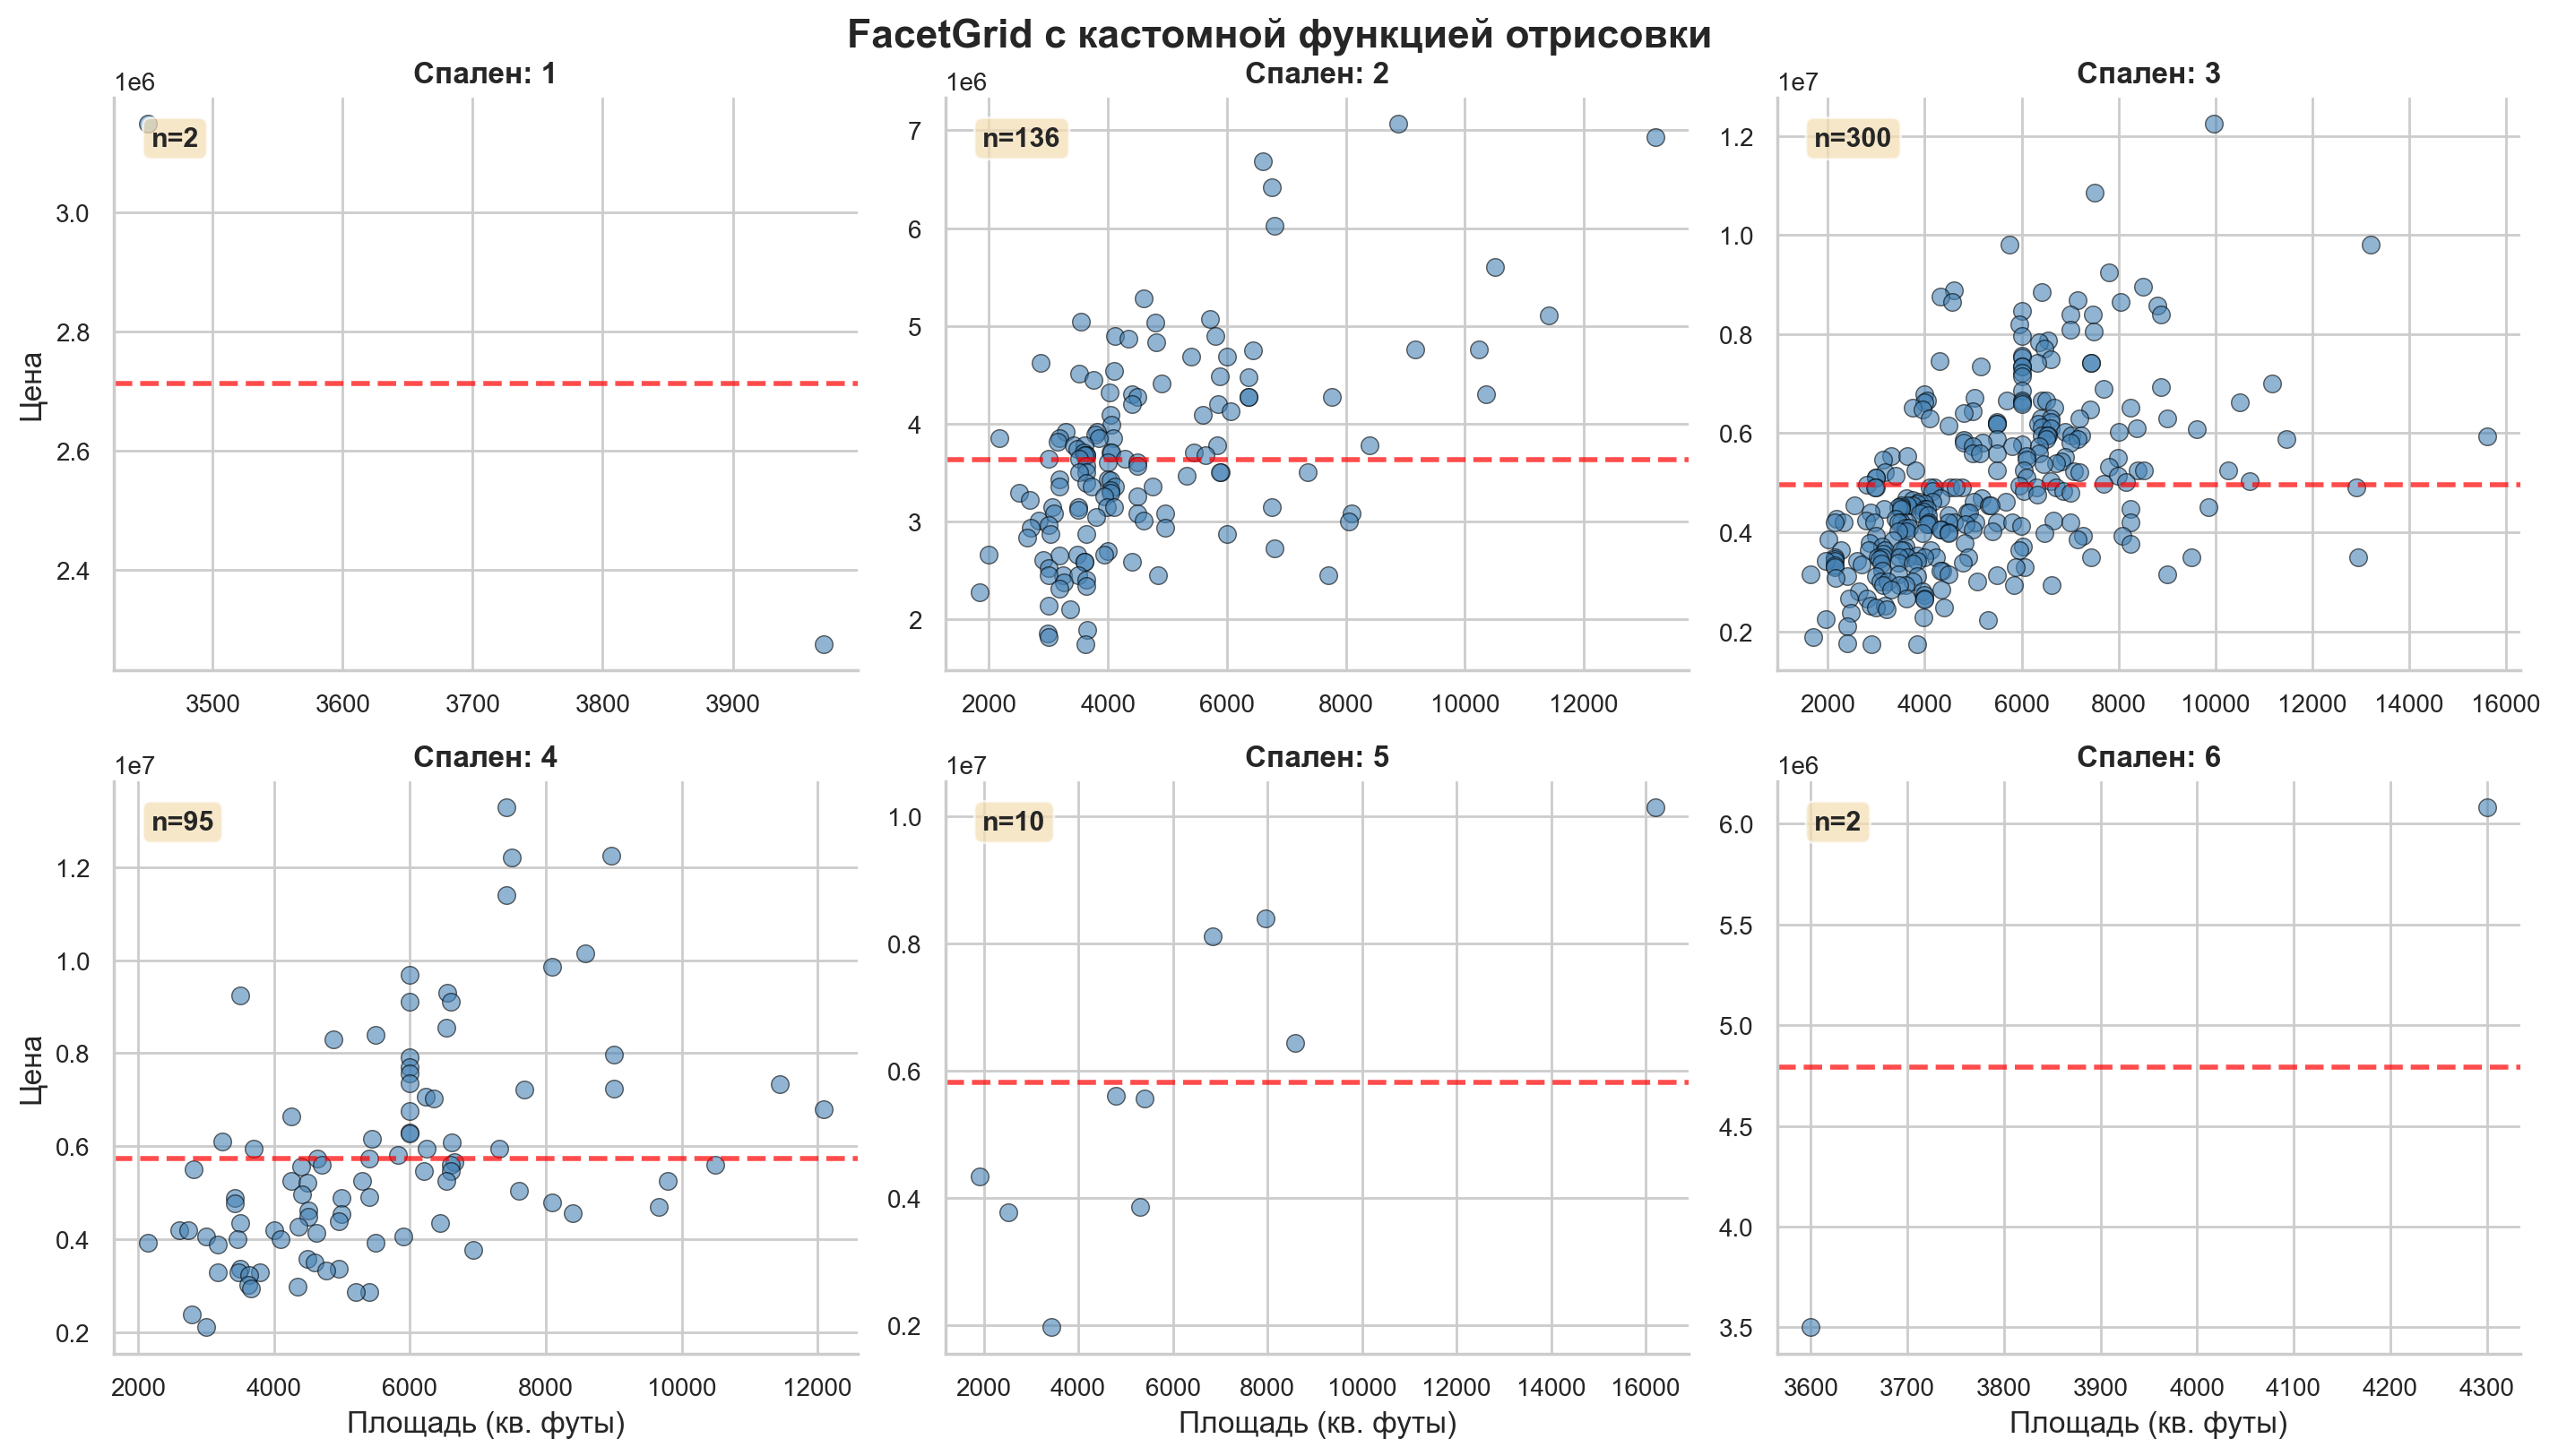

In [14]:
# Создаем FacetGrid
g = sns.FacetGrid(
    df,
    col='bedrooms',
    col_wrap=3, #сколько столбцов будет распологаться в рамках сетки графиков
    height=4,
    aspect=1.2, #соотношение высоты и ширины
    sharex=False, #делить оси между колонками и столбцами
    sharey=False
)

# Применяем кастомную функцию
g.map(
    custom_plot,
    'area',
    'price',
    alpha=0.6,
    s=50,
    edgecolor='black',
    linewidth=0.5,
    color='steelblue'
)

g.set_titles("Спален: {col_name}", fontsize=14, fontweight='bold')
g.set_axis_labels("Площадь (кв. футы)", "Цена", fontsize=12)

g.fig.suptitle('FacetGrid с кастомной функцией отрисовки',
               fontsize=16, fontweight='bold', y=1.01)

plt.show()



###  Упражнение 4: Работа с FacetGrid

**Задание:**
Создайте FacetGrid со следующими параметрами:
1. Столбцы по `parking` (количество парковочных мест)
2. Цвет (hue) по `prefarea` (предпочтительный район)
3. Используйте `col_wrap=3`
4. Примените histogram для переменной `price`



## 5. PairPlot и PairGrid

### 5.1. PairPlot - быстрый обзор взаимосвязей

**PairPlot** создает матрицу scatter plots для всех пар числовых переменных.

**Ключевые параметры:**
- `vars` - список переменных для отображения
- `hue` - разделение по категориям
- `diag_kind` - тип диагональных графиков ('hist', 'kde', 'auto')
- `kind` - тип недиагональных графиков ('scatter', 'reg', 'kde', 'hist')
- `markers` - стили маркеров для категорий
- `palette` - цветовая палитра


https://seaborn.pydata.org/generated/seaborn.pairplot.html



### 5.2. PairPlot с разделением по категориям


In [ ]:

# PairPlot с hue
g = sns.pairplot(
    df_clean,
    vars=['price', 'area', 'bedrooms', 'bathrooms'],
    hue='airconditioning',  # Разделение по кондиционеру
    palette='Set1',
    markers=['o', 's'],     # Разные маркеры для категорий
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'white', 'linewidth': 0.5},
    diag_kws={'alpha': 0.7, 'linewidth': 2.5}
)

# Настройка легенды
g._legend.set_title('Кондиционер')
new_labels = ['Нет', 'Есть']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.suptitle('PairPlot с разделением по наличию кондиционера',
               fontsize=16, fontweight='bold', y=1.01)

plt.show()



### 5.3. PairGrid - полный контроль над матрицей

**PairGrid** дает максимальную гибкость:
- `map_diag()` - функция для диагонали
- `map_upper()` - функция для верхнего треугольника
- `map_lower()` - функция для нижнего треугольника
- `map_offdiag()` - функция для всех недиагональных элементов


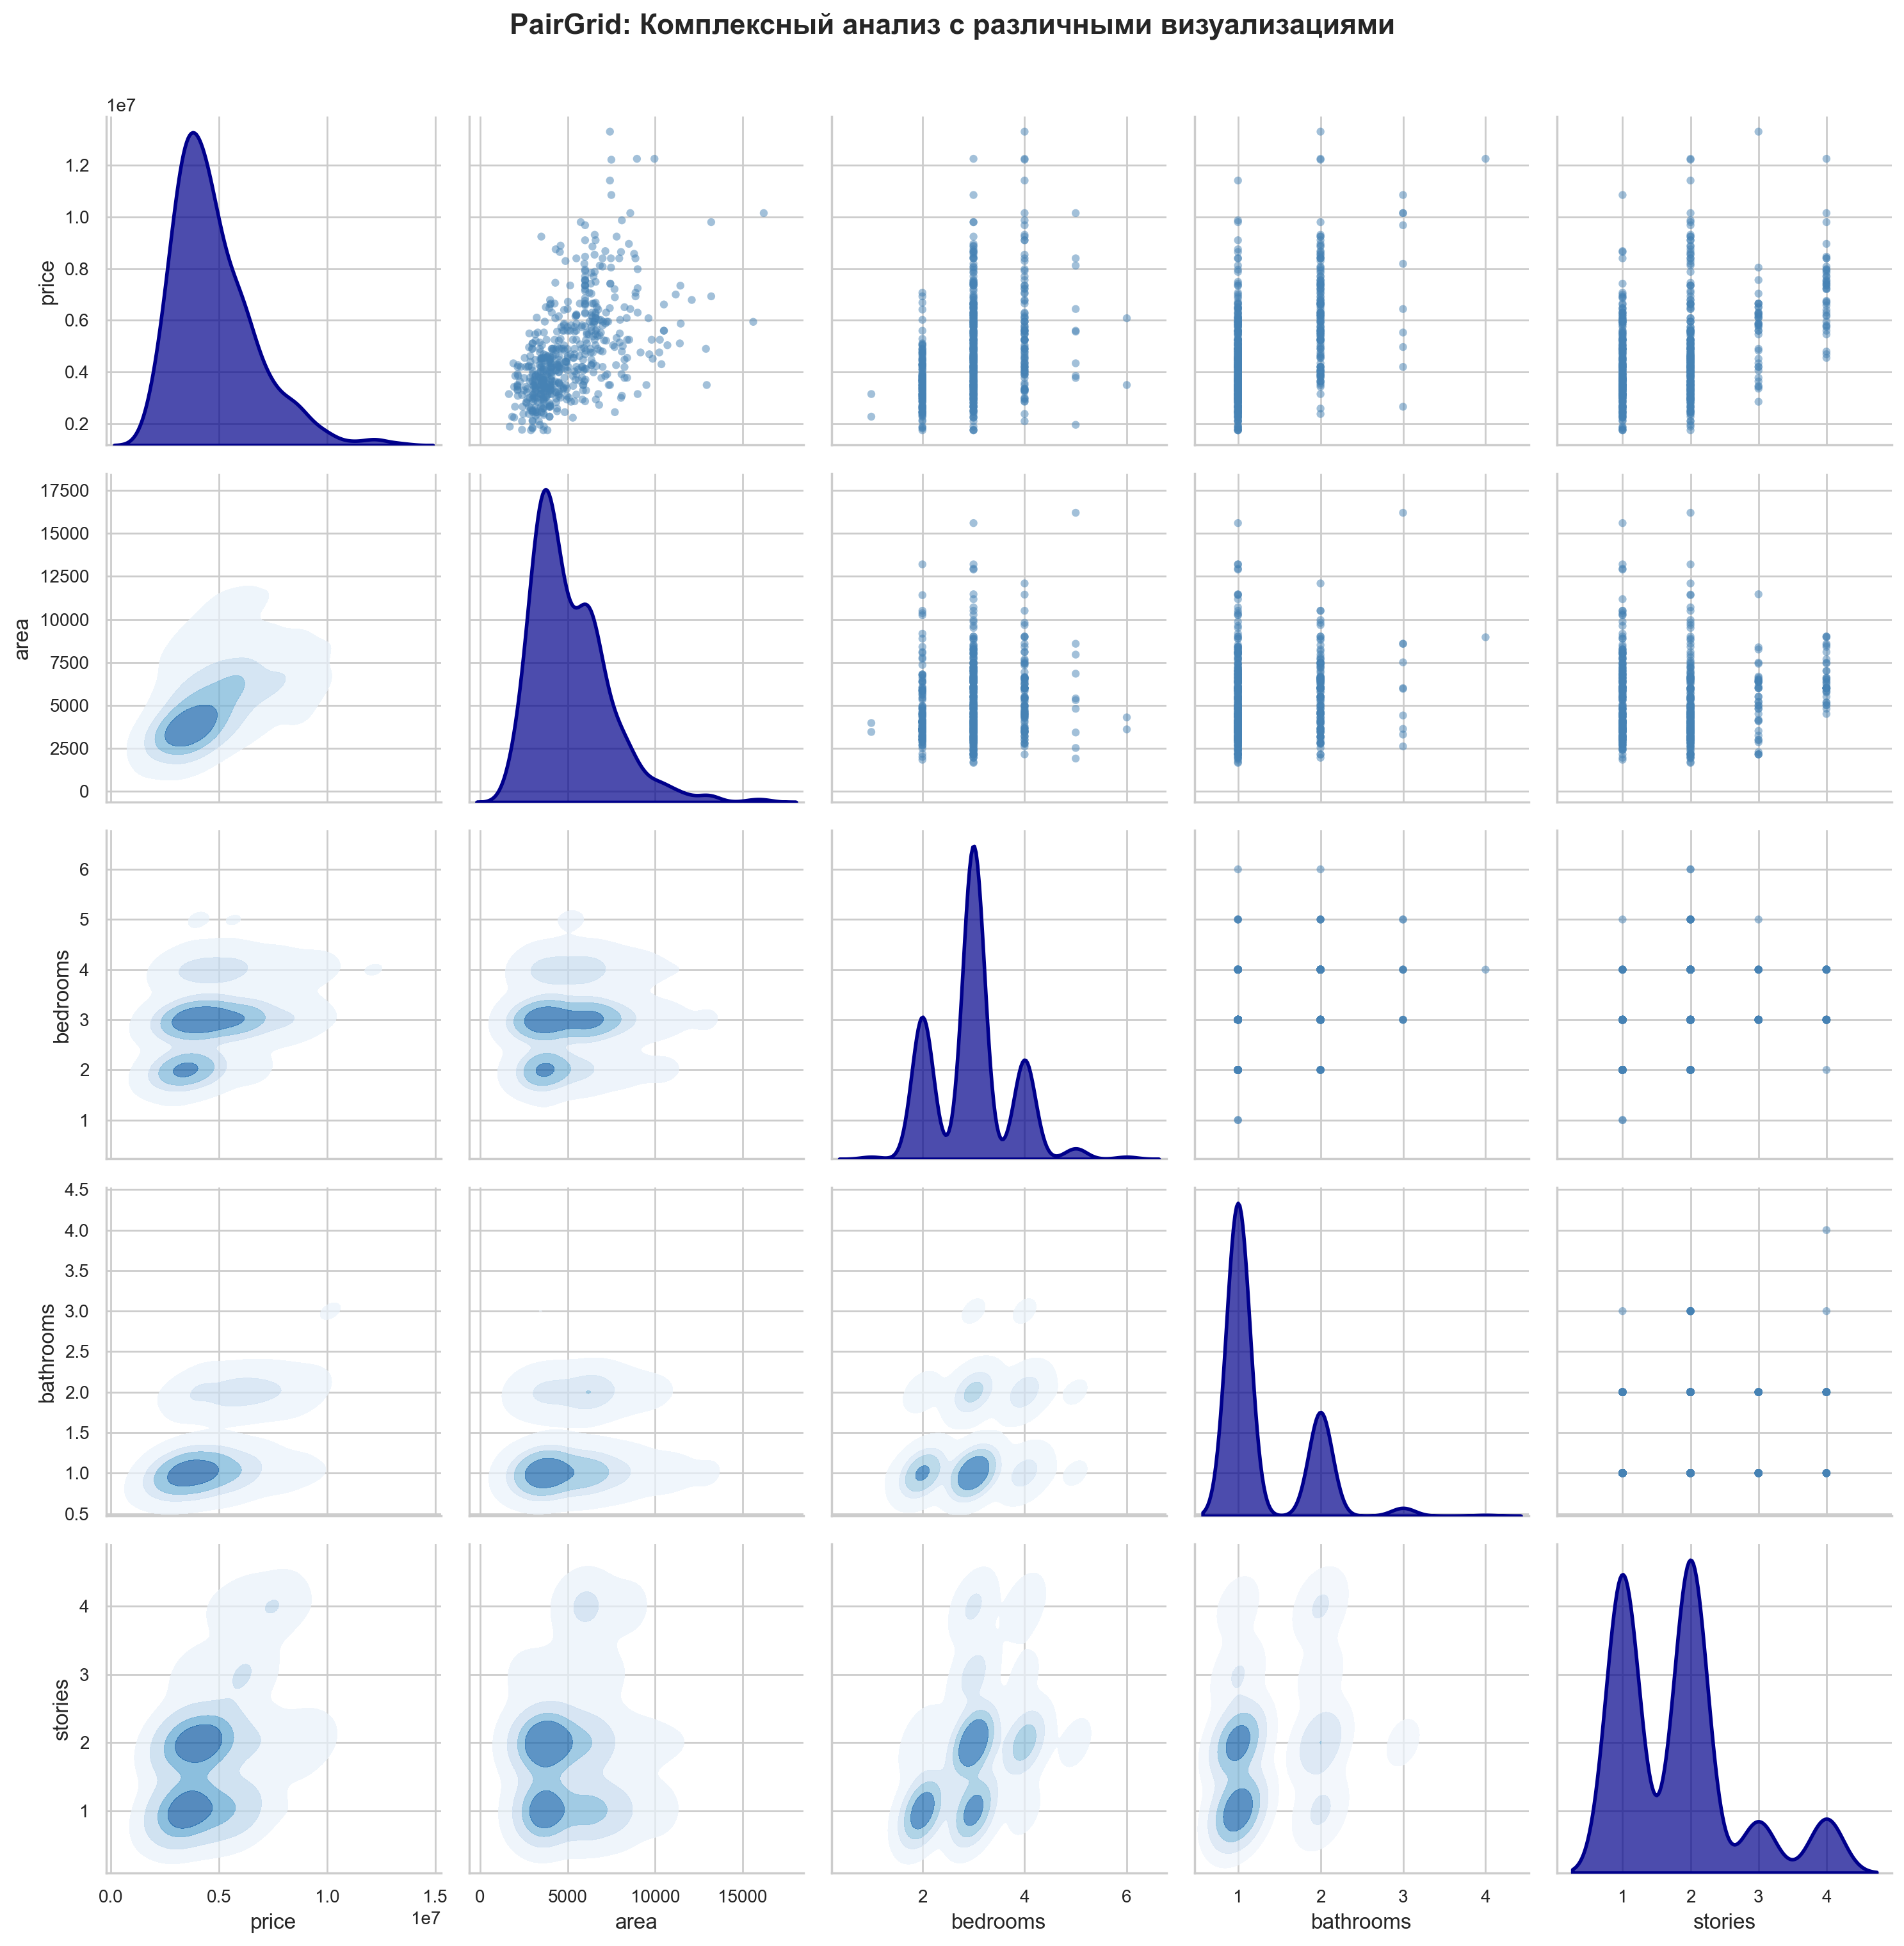

In [15]:

# Создаем PairGrid
selected_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']

g = sns.PairGrid(
    df[selected_vars],
    height=3,
    aspect=1,
    diag_sharey=False    # Разные оси Y для диагонали
)

# Верхний треугольник: scatter + регрессия
g.map_upper(sns.scatterplot, alpha=0.5, s=20, edgecolor='none', color='steelblue')


# Диагональ: KDE с заливкой
g.map_diag(sns.kdeplot, fill=True, alpha=0.7, linewidth=2, color='darkblue')

# Нижний треугольник: 2D KDE
g.map_lower(sns.kdeplot, cmap='Blues', fill=True, alpha=0.7, levels=5)


g.fig.suptitle('PairGrid: Комплексный анализ с различными визуализациями',
               fontsize=16, fontweight='bold', y=1.01)

plt.tight_layout()
plt.show()



### Упражнение 5: PairPlot и PairGrid

**Задание 1: PairPlot**
Создайте PairPlot для переменных `['price', 'area', 'parking', 'stories']` с:
1. Разделением (hue) по `basement`
2. Диагональными графиками типа 'hist'
3. Палитрой 'coolwarm'
4. Разными маркерами для категорий
